In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
%matplotlib inline

In [2]:
specials = pd.read_pickle('data/comedy_transcripts.pkl')
reviews = pd.read_pickle('data/user_reviews.pkl')

In [3]:
def clean_name(title):
    return ' '.join([word.capitalize() for word in title.split('-')
                    if word not in ['full', 'transcript']])
specials['special'] = specials.special.apply(lambda title: clean_name(title))

In [4]:
specials.head()

,special,text
0,Billy Connolly High Horse Tour Live,"Ladies and gentlemen, would you please welcome..."
1,Hannah Gadsby Douglas,The following is the transcript of Hannah Gadb...
2,Patton Oswalt I Love Everything,This is the full transcript of Patton Oswalt: ...
3,Russell Peters Deported,[TYPING] [CHEERING] NARRATOR: Ladies and gentl...
4,Jimmy O Yang Good Deal,"ANNOUNCER: Ladies and gentlemen, welcome to th..."


In [5]:
reviews.shape

(3180, 318)

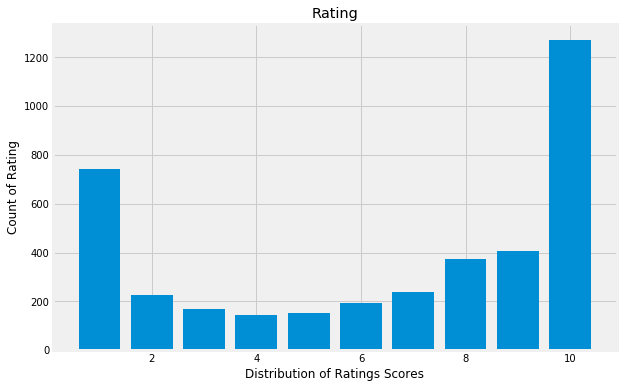

In [6]:
scores = np.unique(reviews[reviews > 0].values.flatten(), return_counts=True)
fig, ax = plt.subplots(figsize=(9, 6))

ax.bar(scores[0][:10], scores[1][:10])
ax.set_xlabel('Distribution of Ratings Scores')
ax.set_ylabel('Count of Rating')
ax.set_title('Rating')
plt.savefig('figs/ratings_distribution.png')

In [7]:
# Some of these are talkshow monologues and excerpts
# We can refer to this column to roughly seperate full specials from these transcriptions
specials['length'] = specials['text'].apply(lambda txt: len(txt))

In [8]:
reviews.head()

,0,1,2,3,4,5,6,7,8,9,...,308,309,310,311,312,313,314,315,316,317
Jeremy_Urquhart,0,8,0,0,0,0,0,0,0,7,...,0,0,0,0,0,0,0,0,0,0
rteodore,0,10,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
garrylane-57132,0,10,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
mariellealien,0,10,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
burlanescuelena,0,10,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Get Total Number of Reviews By Users

In [9]:
review_counts = (reviews > 0).sum(axis=1)

In [10]:
review_counts.value_counts()

1     2884
2      189
3       44
4       28
5        7
9        4
6        4
8        4
7        3
12       2
17       2
13       2
11       2
14       1
34       1
10       1
64       1
36       1
dtype: int64

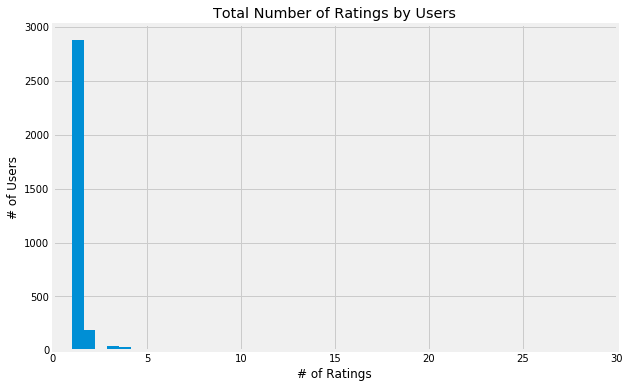

In [11]:
fig, ax = plt.subplots(figsize=(9, 6))

ax.hist(review_counts, bins=100)
ax.set_xlim(0,30)
ax.set_xlabel('# of Ratings')
ax.set_ylabel('# of Users')
ax.set_title('Total Number of Ratings by Users')
plt.savefig('figs/reviewcounts.png')

### Get Total Number of Reviews by Special

In [12]:
special_counts = (reviews > 0).sum(axis=0)

Text(0.5, 1.0, 'Total Number of Ratings for Comedy Specials')

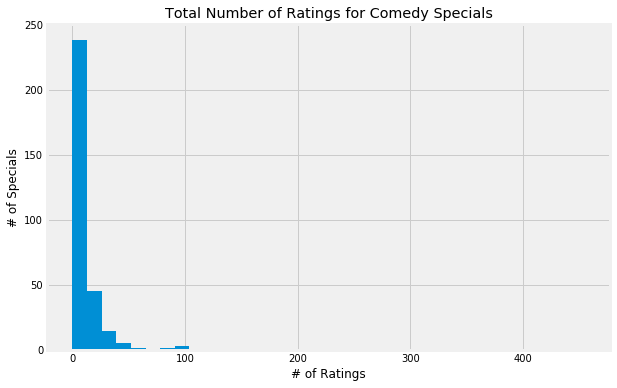

In [13]:
fig, ax = plt.subplots(figsize=(9, 6))

ax.hist(special_counts, bins=35)
ax.set_xlabel('# of Ratings')
ax.set_ylabel('# of Specials')
ax.set_title('Total Number of Ratings for Comedy Specials')
plt.savefig('figs/specialcounts.png')

### Explore 'Specials' That Have No Reviews

In [14]:
no_reviews = specials.loc[(special_counts[special_counts == 0].index).astype(int)]

In [15]:
short_shows = no_reviews.query('length <= 13000')
long_shows = no_reviews.query('length > 13000')

In [16]:
short_shows

,special,text,length
10,Bill Burr Late Show With David Letterman 2010,Bill Burr performing on The Late Show with Dav...,4769
16,Dave Allen First Day At School,Dave Allen on his first day at Catholic school...,3792
19,George Carlin Indian Drill Sergeant,"In 1965 The Indian Sergeant, was emerging as G...",5584
22,Bert Kreischer Fighting A Bear,"The machine, Mr. Bert Kreischer, everybody. Le...",5766
32,Ricky Gervais 2020 Golden Globes Monologue,Hello and welcome to the 77th annual Golden Gl...,5189
43,Sebastian Maniscalco Tonight Show Starring Jim...,Sebastian Maniscalco returns to The Tonight Sh...,3451
45,Ryan Hamilton Stand Up The Tonight Show Starri...,"Published on Sep 11, 2019 The Tonight Show Sta...",4945
46,Mark Normand Stand Up Tonight Show Starring Ji...,"Aired on September 19, 2019 Hey, hey. All righ...",5407
47,George Carlin Dumb Americans,From Life Is Worth Losing\nRecorded on Novembe...,12508
53,Kevin Hart Gun Compartment,Kevin Hart acts out fantasy scenarios of drawi...,3331


In [17]:
specials_to_remove = list(short_shows.index)

In [18]:
long_shows

,special,text,length
0,Billy Connolly High Horse Tour Live,"Ladies and gentlemen, would you please welcome...",64226
6,Lee Mack Going Out Live,This programme contains strong language [APPLA...,46269
29,Sara Pascoe Ladsladslads 2019,CHEERING AND APPLAUSE Thank you so much! Thank...,26017
34,Kevin Bridges Story So Far Live Glasgow,Im at the crossroads \n Getting drowned in wh...,46211
35,Kevin Bridges The Story Continues,(ROCK MUSIC PLAYING) (BARKING) Oh! (COUGHS) (G...,51131
36,Andy Woodhull Youll Always Be Late,I live a life where I never know whats coming ...,31187
49,Brazil Corruption Amazon Hasan Minhaj,"On this episode of Patriot Act, Hasan breaks d...",19849
51,Emily Heller Ice Thickeners,"Emily Heller compares Donald Trump to Air Bud,...",43827
55,Ralphie May Filthy Animal Tour,Ralphie May hosts his legendary Filthy Animals...,58144
60,The Standups Gina Yashere 2018,"[announcer] And now, coming to the stage, Gina...",19953


In [19]:
# You may disagree but 'White House Dinners' should not be considered specials so we'll drop those as well
# Volka Pisper is a German comic and I believe his transcript comes from a translation so we'll also drop that
specials_to_remove.extend([293, 309, 116, 49, 91])

In [20]:
specials.drop(index=specials_to_remove, inplace=True)
reviews.drop(columns=[k for k in specials_to_remove], inplace=True)

In [21]:
#save our work!
specials.to_pickle('data/working_corpus.pkl')
reviews.to_pickle('data/working_reviews.pkl')

### Look at Review Matrix Density

In [22]:
number_of_reviews = review_counts.sum()
density = number_of_reviews/(reviews.shape[0]*reviews.shape[1])

In [23]:
print (f'Matrix Density = {density}')

Matrix Density = 0.004400269541778976


In [24]:
#head_explodes.gif

### Look at some specific titles for curiousity

In [25]:
#most loved specials
loved_metric = ((reviews >= 8).sum(axis=0)).sort_values(ascending=False)
most_loved = pd.concat([loved_metric, specials.loc[loved_metric.index.astype(int)]], axis=1).head(15)
most_loved.rename(columns={0:'num_loved_reviews'})

,num_loved_reviews,special,text,length
50,405,Dave Chappelle Sticks Stones,Sticks & Stones is Dave Chappelles fifth Netfl...,41592
94,78,Adam Sandler 100 Fresh,"[man] Okay, ready, and... Take your own cue, A...",53136
48,68,Bill Burr Paper Tiger,"Recorded Live at the Royal Albert Hall, London...",59652
124,67,Hannah Gadsby Nanette,[Bobby Reid plays]\n Theres blood in the water...,46589
76,47,Amy Schumer Growing,"Yes! Thank you so much, Chicago. Thank you. I ...",33663
171,43,Eddie Izzard Dress Kill 1999,San Francisco. Town city of gleaming spires. P...,74384
11,43,Sincerely Louis Ck,Great comedy is finally back. Louis C.K. is no...,43141
306,39,Eddie Murphy Delirious,"Filmed on August 17, 1983 at DAR Constitution ...",41268
71,35,Robin Williams Live On Broadway 2002,"Ladies and gentlemen, please welcome Robin Wil...",62013
148,35,Ricky Gervais Humanity,Hello. Hello! How you doing? Great. Thank you....,55998


In [26]:
#most hated specials
hated_metric = (((reviews > 0) & (reviews <= 2)).sum(axis=0)).sort_values(ascending=False)
most_hated = pd.concat([hated_metric, specials.loc[hated_metric.index.astype(int)]], axis=1).head(15)
most_hated.rename(columns={0:'num_hated_reviews'})

,num_hated_reviews,special,text,length
279,156,Amy Schumer Leather Special 2017,"[announcer] Ladies and gentleman, and all you ...",33433
124,59,Hannah Gadsby Nanette,[Bobby Reid plays]\n Theres blood in the water...,46589
76,55,Amy Schumer Growing,"Yes! Thank you so much, Chicago. Thank you. I ...",33663
156,53,Chris Rock Tamborine,[indistinct overlapping chatter] [woman] Ladie...,38322
88,39,Ellen Degeneres Relatable,A NETFLIX ORIGINAL COMEDY SPECIAL [crowd cheer...,46509
74,26,Kevin Hart Irresponsible,[heartbeat] [indistinct chatter] [atmospheric ...,53832
25,25,Pete Davidson Alive From New York,"So, Louis C.K. tried to get me fired from SNL ...",43035
50,24,Dave Chappelle Sticks Stones,Sticks & Stones is Dave Chappelles fifth Netfl...,41592
81,23,Ken Jeong You Complete Me Ho,The Hangover... Community... Dr. Ken... Crazy ...,45576
9,19,Jerry Seinfeld 23 Hours To Kill,"Jerry Seinfelds new hourlong comedy special, J...",42270


## ADDITIONAL EDA PERFORMED AFTER CLUSTERS APPLIED TO DF

In [27]:
specials = pd.read_pickle('data/working_corpus.pkl')
reviews = pd.read_pickle('data/working_reviews.pkl')

In [28]:
review_count = (reviews > 0).sum(axis=0)

In [29]:
check_stuff = pd.concat([specials.special, specials.genre, review_count], axis=1)

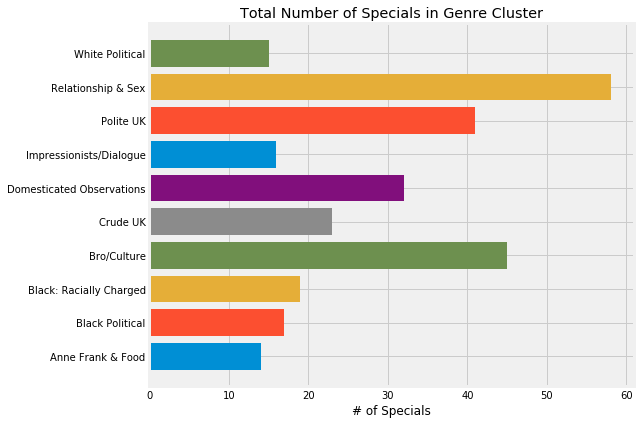

In [30]:
fig, ax = plt.subplots(figsize=(9, 6))
for genre, count in zip(np.sort(check_stuff.genre.unique()), check_stuff.groupby('genre')[[0]].count().values.flatten()):
    ax.barh(genre, count)
ax.set_xlabel('# of Specials')
ax.set_title('Total Number of Specials in Genre Cluster')
ax.set_yticklabels(np.sort(check_stuff.genre.unique()))
fig.tight_layout()
plt.savefig('figs/counts_by_genre.png')

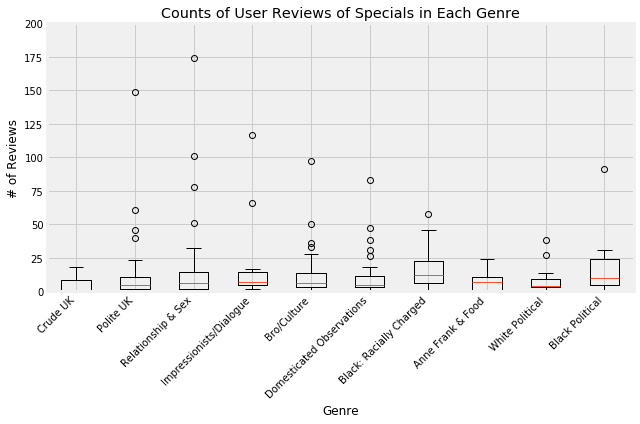

In [31]:
genre_review_counts = []
for group in check_stuff.genre.unique():
    genre_review_counts.append(check_stuff[check_stuff.genre == group][0].values)

fig, ax = plt.subplots(figsize=(9, 6))
plt.boxplot(genre_review_counts)
ax.set_ylim([0,200])
ax.set_xlabel('Genre')
ax.set_ylabel('# of Reviews')
ax.set_title('Counts of User Reviews of Specials in Each Genre')
ax.set_xticklabels(check_stuff.genre.unique(), rotation=45, ha='right')
fig.tight_layout()
plt.savefig('figs/boxplot_by_genre.png')